In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create dataframe from data
data = pd.read_csv("/Users/james/Desktop/Final Project/ZoomData.csv")
df = pd.DataFrame(data)
# convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df['Date']

0     2019-04-18
1     2019-04-22
2     2019-04-23
3     2019-04-24
4     2019-04-25
         ...    
937   2023-02-16
938   2023-02-21
939   2023-02-22
940   2023-02-23
941   2023-02-24
Name: Date, Length: 942, dtype: datetime64[ns]

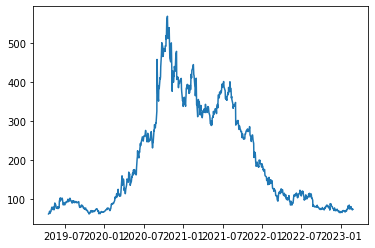

In [4]:
plt.plot(data["Date"], data["Close/Price"])
plt.show()     

In [8]:
# split data before and after June 1st, 2022
before_df = df[df['Date'] < '2020-03-03']
middle_df = df[('2020-03-03' <= df['Date'])& (df['Date']< '2022-03-01')]
after_df = df[df['Date'] >= '2022-03-01']

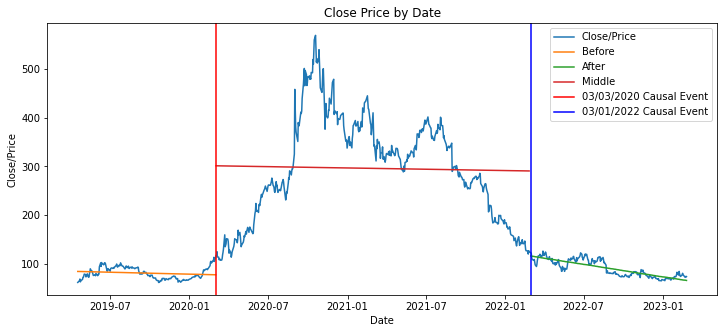

In [20]:
plt.figure(figsize=[12,5])
# Draw the broken line statistical graph
plt.plot(df['Date'], df['Close/Price'], label='Close/Price')

# Draw the fitting line before 2022.6.1
before_fit = np.polyfit(before_df.index, before_df['Close/Price'], 1)
before_line = np.poly1d(before_fit)
plt.plot(before_df['Date'], before_line(before_df.index), label='Before')

# Draw the fitting line after 2022.6.1
after_fit = np.polyfit(after_df.index, after_df['Close/Price'], 1)
after_line = np.poly1d(after_fit)
plt.plot(after_df['Date'], after_line(after_df.index), label='After')

# Draw the fitting line after 2022.6.1
middle_fit = np.polyfit(middle_df.index, middle_df['Close/Price'], 1)
middle_line = np.poly1d(middle_fit)
plt.plot(middle_df['Date'], middle_line(middle_df.index), label='Middle')

plt.axvline(x=pd.to_datetime('2020-03-03'), color='red', linestyle='-', label='03/03/2020 Causal Event')
plt.axvline(x=pd.to_datetime('2022-03-01'), color='blue', linestyle='-', label='03/01/2022 Causal Event')

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close/Price')
plt.title('Close Price by Date')

# Show the plot

plt.show()
